# General imports

In [1]:
import os,sys, glob,shutil
import numpy as np
import matplotlib.pyplot as plt
import tifffile
%matplotlib inline

In [2]:
# this line is so the modules in the next cell get imported. They live in this path.
# Change this to where you cloned ClearMap2
sys.path.append('/jukebox/wang/sanjeev/ClearMap2')

## Clearmap specific imports

In [3]:
import ClearMap.IO.Workspace as wsp
import ClearMap.IO.IO as io
import ClearMap.ImageProcessing.Experts.Cells as cells

## Link the corrected z planes to a new folder and in the process rename them to Z0000.tif, Z0001.tif, ...

In [5]:
# symlink files to a new directory with filenames Z0000.tif, Z0001.tif, etc...
# Change the dst_dir to where you want these z planes linked 
src_dir = os.path.join('/jukebox/LightSheetData/lightserv/cz15',
                       'zimmerman_02/zimmerman_02-f12/imaging_request_1',
                       'rawdata/resolution_3.6x/Ex_642_Em_2_corrected',
                       'RES(7587x5731x3215)/095240/095240_095830')
assert os.path.exists(src_dir)
dst_dir = os.path.join('/jukebox/LightSheetData/lightserv/cz15',
                       'zimmerman_02/zimmerman_02-f12/imaging_request_1',
                       'output/Ex_642_Em_2_corrected_renamed')
if not os.path.exists(dst_dir):
    os.mkdir(dst_dir)
assert os.path.exists(dst_dir)

src_files = sorted(glob.glob(src_dir + '/*tif'))
for ii,src in enumerate(src_files):
    dst_basename = 'Z' + f'{ii}'.zfill(4) + '.tif'
    dst = os.path.join(dst_dir,dst_basename)
    os.symlink(src,dst)

# Set up the workspace


In [6]:
directory = os.path.join('/jukebox/LightSheetData/lightserv/cz15',
                         'zimmerman_02/zimmerman_02-f12/imaging_request_1',
                         'output')
assert os.path.exists(directory)

expression_raw      = 'Ex_642_Em_2_corrected_renamed/Z<Z,4>.tif'    

ws = wsp.Workspace('CellMap', directory=directory);
ws.update(raw=expression_raw)
ws.debug=False
ws.info()

Workspace[CellMap]{/jukebox/LightSheetData/lightserv/cz15/zimmerman_02/zimmerman_02-f12/imaging_request_1/output}
              raw: Ex_642_Em_2_corrected_renamed/Z<Z,4>.tif {3215 files, ('Z',): (0,) -> (3214,)}
 autofluorescence: no file
         stitched: no file
           layout: no file
       background: no file
        resampled: no file
resampled_to_auto: no file
auto_to_reference: no file
            cells: no file
          density: no file



## Verify that the raw data files were corrected read in.
The plot below should show a brain slice and should not be an empty image!

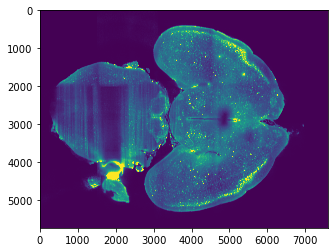

In [7]:
fig=plt.figure()
ax=fig.add_subplot()
z_plane = ws.source('raw')[:,:,2500]
ax.imshow(z_plane,vmin=0,vmax=200)

## created the "stitched" volume -- this just puts the whole brain into a single .npy file
This makes it possible to create smaller subvolumes, which is useful for testing the cell detection down below.

This takes a while to run! ~ 20 mins for me.
Uncomment the lines below and then run the cell once. 

In [8]:
 #source = ws.source('raw');
 #sink   = ws.filename('stitched')
 #io.convert(source, sink, verbose=True) # creates a file called "stitched.npy"

converting FileList-Source(5730, 7586, 3215)[uint16]<3215>{/jukebox/LightSheetData/lightserv/cz15/zimmerman_0..._1/output/Ex_642_Em_2_corrected_renamed/Z<Z,4>.tif} -> /jukebox/LightSheetData/lightserv/cz15/zimmerman_02/zimmerman_02-f12/imaging_request_1/output/stitched.npy
/jukebox/LightSheetData/lightserv/cz15/zimmerman_02/zimmerman_02-f12/imaging_request_1/output/stitched.npy
Converting slice (Ellipsis, 0)Converting slice (Ellipsis, 1)

Converting slice (Ellipsis, 2)
Converting slice (Ellipsis, 3)
Converting slice (Ellipsis, 4)
Converting slice (Ellipsis, 5)
Converting slice (Ellipsis, 6)
Converting slice (Ellipsis, 7)Converting slice (Ellipsis, 8)
Converting slice (Ellipsis, 9)
Converting slice (Ellipsis, 10)
Converting slice (Ellipsis, 11)
Converting slice (Ellipsis, 12)

Converting slice (Ellipsis, 13)
Converting slice (Ellipsis, 14)
Converting slice (Ellipsis, 15)
Converting slice (Ellipsis, 16)
Converting slice (Ellipsis, 17)
Converting slice (Ellipsis, 18)
Converting slice (Ell

Converting slice (Ellipsis, 241)
Converting slice (Ellipsis, 242)
Converting slice (Ellipsis, 243)
Converting slice (Ellipsis, 244)
Converting slice (Ellipsis, 245)
Converting slice (Ellipsis, 246)
Converting slice (Ellipsis, 247)Converting slice (Ellipsis, 248)

Converting slice (Ellipsis, 249)
Converting slice (Ellipsis, 250)
Converting slice (Ellipsis, 251)
Converting slice (Ellipsis, 252)Converting slice (Ellipsis, 253)

Converting slice (Ellipsis, 254)
Converting slice (Ellipsis, 255)
Converting slice (Ellipsis, 256)
Converting slice (Ellipsis, 257)Converting slice (Ellipsis, 258)
Converting slice (Ellipsis, 259)
Converting slice (Ellipsis, 260)

Converting slice (Ellipsis, 261)Converting slice (Ellipsis, 262)

Converting slice (Ellipsis, 263)Converting slice (Ellipsis, 264)

Converting slice (Ellipsis, 265)
Converting slice (Ellipsis, 266)Converting slice (Ellipsis, 267)Converting slice (Ellipsis, 268)
Converting slice (Ellipsis, 269)
Converting slice (Ellipsis, 270)


Converting

Converting slice (Ellipsis, 490)
Converting slice (Ellipsis, 491)
Converting slice (Ellipsis, 492)Converting slice (Ellipsis, 493)

Converting slice (Ellipsis, 494)
Converting slice (Ellipsis, 495)
Converting slice (Ellipsis, 496)
Converting slice (Ellipsis, 497)
Converting slice (Ellipsis, 498)
Converting slice (Ellipsis, 499)
Converting slice (Ellipsis, 500)Converting slice (Ellipsis, 501)

Converting slice (Ellipsis, 502)Converting slice (Ellipsis, 503)

Converting slice (Ellipsis, 504)
Converting slice (Ellipsis, 505)
Converting slice (Ellipsis, 506)
Converting slice (Ellipsis, 507)Converting slice (Ellipsis, 508)

Converting slice (Ellipsis, 509)
Converting slice (Ellipsis, 510)Converting slice (Ellipsis, 511)

Converting slice (Ellipsis, 512)
Converting slice (Ellipsis, 513)
Converting slice (Ellipsis, 514)
Converting slice (Ellipsis, 515)
Converting slice (Ellipsis, 516)
Converting slice (Ellipsis, 517)
Converting slice (Ellipsis, 518)
Converting slice (Ellipsis, 519)Converting 

Converting slice (Ellipsis, 739)Converting slice (Ellipsis, 740)

Converting slice (Ellipsis, 741)
Converting slice (Ellipsis, 742)
Converting slice (Ellipsis, 743)
Converting slice (Ellipsis, 744)Converting slice (Ellipsis, 745)

Converting slice (Ellipsis, 746)
Converting slice (Ellipsis, 747)
Converting slice (Ellipsis, 748)Converting slice (Ellipsis, 749)
Converting slice (Ellipsis, 750)
Converting slice (Ellipsis, 751)

Converting slice (Ellipsis, 752)Converting slice (Ellipsis, 753)

Converting slice (Ellipsis, 754)
Converting slice (Ellipsis, 755)
Converting slice (Ellipsis, 756)
Converting slice (Ellipsis, 757)Converting slice (Ellipsis, 758)

Converting slice (Ellipsis, 759)
Converting slice (Ellipsis, 760)
Converting slice (Ellipsis, 761)Converting slice (Ellipsis, 762)

Converting slice (Ellipsis, 763)Converting slice (Ellipsis, 764)

Converting slice (Ellipsis, 765)
Converting slice (Ellipsis, 766)
Converting slice (Ellipsis, 767)
Converting slice (Ellipsis, 768)Converting 

Converting slice (Ellipsis, 989)
Converting slice (Ellipsis, 990)
Converting slice (Ellipsis, 991)Converting slice (Ellipsis, 992)

Converting slice (Ellipsis, 993)
Converting slice (Ellipsis, 994)Converting slice (Ellipsis, 995)

Converting slice (Ellipsis, 996)
Converting slice (Ellipsis, 997)
Converting slice (Ellipsis, 998)
Converting slice (Ellipsis, 999)
Converting slice (Ellipsis, 1000)
Converting slice (Ellipsis, 1001)
Converting slice (Ellipsis, 1002)
Converting slice (Ellipsis, 1003)
Converting slice (Ellipsis, 1004)
Converting slice (Ellipsis, 1005)Converting slice (Ellipsis, 1006)

Converting slice (Ellipsis, 1007)
Converting slice (Ellipsis, 1008)
Converting slice (Ellipsis, 1009)Converting slice (Ellipsis, 1010)Converting slice (Ellipsis, 1011)Converting slice (Ellipsis, 1012)
Converting slice (Ellipsis, 1013)


Converting slice (Ellipsis, 1014)
Converting slice (Ellipsis, 1015)

Converting slice (Ellipsis, 1016)
Converting slice (Ellipsis, 1017)
Converting slice (Ellipsi

Converting slice (Ellipsis, 1231)
Converting slice (Ellipsis, 1232)
Converting slice (Ellipsis, 1233)
Converting slice (Ellipsis, 1234)
Converting slice (Ellipsis, 1235)
Converting slice (Ellipsis, 1236)
Converting slice (Ellipsis, 1237)
Converting slice (Ellipsis, 1238)Converting slice (Ellipsis, 1239)

Converting slice (Ellipsis, 1240)
Converting slice (Ellipsis, 1241)Converting slice (Ellipsis, 1242)

Converting slice (Ellipsis, 1243)Converting slice (Ellipsis, 1244)

Converting slice (Ellipsis, 1245)
Converting slice (Ellipsis, 1246)Converting slice (Ellipsis, 1247)Converting slice (Ellipsis, 1248)


Converting slice (Ellipsis, 1249)Converting slice (Ellipsis, 1250)
Converting slice (Ellipsis, 1251)

Converting slice (Ellipsis, 1252)
Converting slice (Ellipsis, 1253)
Converting slice (Ellipsis, 1254)Converting slice (Ellipsis, 1255)

Converting slice (Ellipsis, 1256)
Converting slice (Ellipsis, 1257)
Converting slice (Ellipsis, 1258)
Converting slice (Ellipsis, 1259)
Converting sli

Converting slice (Ellipsis, 1473)
Converting slice (Ellipsis, 1474)
Converting slice (Ellipsis, 1475)
Converting slice (Ellipsis, 1476)
Converting slice (Ellipsis, 1477)Converting slice (Ellipsis, 1478)

Converting slice (Ellipsis, 1479)
Converting slice (Ellipsis, 1480)Converting slice (Ellipsis, 1481)

Converting slice (Ellipsis, 1482)
Converting slice (Ellipsis, 1483)Converting slice (Ellipsis, 1484)

Converting slice (Ellipsis, 1485)
Converting slice (Ellipsis, 1486)
Converting slice (Ellipsis, 1487)
Converting slice (Ellipsis, 1488)
Converting slice (Ellipsis, 1489)
Converting slice (Ellipsis, 1490)Converting slice (Ellipsis, 1491)

Converting slice (Ellipsis, 1492)Converting slice (Ellipsis, 1493)

Converting slice (Ellipsis, 1494)
Converting slice (Ellipsis, 1495)Converting slice (Ellipsis, 1496)

Converting slice (Ellipsis, 1497)Converting slice (Ellipsis, 1498)

Converting slice (Ellipsis, 1499)
Converting slice (Ellipsis, 1500)
Converting slice (Ellipsis, 1501)Converting slic

Converting slice (Ellipsis, 1714)Converting slice (Ellipsis, 1715)

Converting slice (Ellipsis, 1716)
Converting slice (Ellipsis, 1717)
Converting slice (Ellipsis, 1718)Converting slice (Ellipsis, 1719)

Converting slice (Ellipsis, 1720)Converting slice (Ellipsis, 1721)

Converting slice (Ellipsis, 1722)
Converting slice (Ellipsis, 1723)
Converting slice (Ellipsis, 1724)
Converting slice (Ellipsis, 1725)
Converting slice (Ellipsis, 1726)
Converting slice (Ellipsis, 1727)
Converting slice (Ellipsis, 1728)
Converting slice (Ellipsis, 1729)
Converting slice (Ellipsis, 1730)Converting slice (Ellipsis, 1731)
Converting slice (Ellipsis, 1732)

Converting slice (Ellipsis, 1733)Converting slice (Ellipsis, 1734)

Converting slice (Ellipsis, 1735)
Converting slice (Ellipsis, 1736)
Converting slice (Ellipsis, 1737)
Converting slice (Ellipsis, 1738)
Converting slice (Ellipsis, 1739)
Converting slice (Ellipsis, 1740)
Converting slice (Ellipsis, 1741)
Converting slice (Ellipsis, 1742)
Converting sli

Converting slice (Ellipsis, 1955)Converting slice (Ellipsis, 1956)

Converting slice (Ellipsis, 1957)
Converting slice (Ellipsis, 1958)
Converting slice (Ellipsis, 1959)Converting slice (Ellipsis, 1960)

Converting slice (Ellipsis, 1961)
Converting slice (Ellipsis, 1962)
Converting slice (Ellipsis, 1963)
Converting slice (Ellipsis, 1964)
Converting slice (Ellipsis, 1965)
Converting slice (Ellipsis, 1966)
Converting slice (Ellipsis, 1967)Converting slice (Ellipsis, 1968)

Converting slice (Ellipsis, 1969)
Converting slice (Ellipsis, 1970)Converting slice (Ellipsis, 1971)

Converting slice (Ellipsis, 1972)Converting slice (Ellipsis, 1973)

Converting slice (Ellipsis, 1974)Converting slice (Ellipsis, 1975)
Converting slice (Ellipsis, 1976)

Converting slice (Ellipsis, 1977)
Converting slice (Ellipsis, 1978)
Converting slice (Ellipsis, 1979)Converting slice (Ellipsis, 1980)

Converting slice (Ellipsis, 1981)
Converting slice (Ellipsis, 1982)
Converting slice (Ellipsis, 1983)
Converting sli

Converting slice (Ellipsis, 2197)
Converting slice (Ellipsis, 2198)
Converting slice (Ellipsis, 2199)
Converting slice (Ellipsis, 2200)Converting slice (Ellipsis, 2201)

Converting slice (Ellipsis, 2202)
Converting slice (Ellipsis, 2203)
Converting slice (Ellipsis, 2204)
Converting slice (Ellipsis, 2205)
Converting slice (Ellipsis, 2206)Converting slice (Ellipsis, 2207)

Converting slice (Ellipsis, 2208)
Converting slice (Ellipsis, 2209)
Converting slice (Ellipsis, 2210)
Converting slice (Ellipsis, 2211)
Converting slice (Ellipsis, 2212)
Converting slice (Ellipsis, 2213)
Converting slice (Ellipsis, 2214)
Converting slice (Ellipsis, 2215)Converting slice (Ellipsis, 2216)

Converting slice (Ellipsis, 2217)
Converting slice (Ellipsis, 2218)
Converting slice (Ellipsis, 2219)
Converting slice (Ellipsis, 2220)
Converting slice (Ellipsis, 2221)Converting slice (Ellipsis, 2222)

Converting slice (Ellipsis, 2223)
Converting slice (Ellipsis, 2224)
Converting slice (Ellipsis, 2225)
Converting sli

Converting slice (Ellipsis, 2438)
Converting slice (Ellipsis, 2439)
Converting slice (Ellipsis, 2440)Converting slice (Ellipsis, 2441)

Converting slice (Ellipsis, 2442)
Converting slice (Ellipsis, 2443)
Converting slice (Ellipsis, 2444)
Converting slice (Ellipsis, 2445)
Converting slice (Ellipsis, 2446)
Converting slice (Ellipsis, 2447)
Converting slice (Ellipsis, 2448)
Converting slice (Ellipsis, 2449)
Converting slice (Ellipsis, 2450)
Converting slice (Ellipsis, 2451)Converting slice (Ellipsis, 2452)

Converting slice (Ellipsis, 2453)
Converting slice (Ellipsis, 2454)
Converting slice (Ellipsis, 2455)
Converting slice (Ellipsis, 2456)
Converting slice (Ellipsis, 2457)
Converting slice (Ellipsis, 2458)
Converting slice (Ellipsis, 2459)Converting slice (Ellipsis, 2460)

Converting slice (Ellipsis, 2461)
Converting slice (Ellipsis, 2462)Converting slice (Ellipsis, 2463)

Converting slice (Ellipsis, 2464)
Converting slice (Ellipsis, 2465)
Converting slice (Ellipsis, 2466)
Converting sli

Converting slice (Ellipsis, 2680)
Converting slice (Ellipsis, 2681)
Converting slice (Ellipsis, 2682)
Converting slice (Ellipsis, 2683)
Converting slice (Ellipsis, 2684)
Converting slice (Ellipsis, 2685)
Converting slice (Ellipsis, 2686)
Converting slice (Ellipsis, 2687)
Converting slice (Ellipsis, 2688)
Converting slice (Ellipsis, 2689)Converting slice (Ellipsis, 2690)

Converting slice (Ellipsis, 2691)
Converting slice (Ellipsis, 2692)
Converting slice (Ellipsis, 2693)Converting slice (Ellipsis, 2694)

Converting slice (Ellipsis, 2695)
Converting slice (Ellipsis, 2696)
Converting slice (Ellipsis, 2697)
Converting slice (Ellipsis, 2698)
Converting slice (Ellipsis, 2699)
Converting slice (Ellipsis, 2700)
Converting slice (Ellipsis, 2701)
Converting slice (Ellipsis, 2702)
Converting slice (Ellipsis, 2703)
Converting slice (Ellipsis, 2704)
Converting slice (Ellipsis, 2705)
Converting slice (Ellipsis, 2706)
Converting slice (Ellipsis, 2707)
Converting slice (Ellipsis, 2708)
Converting sli

Converting slice (Ellipsis, 2923)
Converting slice (Ellipsis, 2924)Converting slice (Ellipsis, 2925)

Converting slice (Ellipsis, 2926)Converting slice (Ellipsis, 2927)
Converting slice (Ellipsis, 2928)
Converting slice (Ellipsis, 2929)

Converting slice (Ellipsis, 2930)Converting slice (Ellipsis, 2931)Converting slice (Ellipsis, 2932)

Converting slice (Ellipsis, 2933)

Converting slice (Ellipsis, 2934)
Converting slice (Ellipsis, 2935)
Converting slice (Ellipsis, 2936)
Converting slice (Ellipsis, 2937)
Converting slice (Ellipsis, 2938)
Converting slice (Ellipsis, 2939)
Converting slice (Ellipsis, 2940)
Converting slice (Ellipsis, 2941)
Converting slice (Ellipsis, 2942)Converting slice (Ellipsis, 2943)Converting slice (Ellipsis, 2944)


Converting slice (Ellipsis, 2945)
Converting slice (Ellipsis, 2946)
Converting slice (Ellipsis, 2947)
Converting slice (Ellipsis, 2948)
Converting slice (Ellipsis, 2949)
Converting slice (Ellipsis, 2950)Converting slice (Ellipsis, 2951)
Converting slic

Converting slice (Ellipsis, 3164)
Converting slice (Ellipsis, 3165)
Converting slice (Ellipsis, 3166)
Converting slice (Ellipsis, 3167)
Converting slice (Ellipsis, 3168)
Converting slice (Ellipsis, 3169)
Converting slice (Ellipsis, 3170)
Converting slice (Ellipsis, 3171)
Converting slice (Ellipsis, 3172)Converting slice (Ellipsis, 3173)

Converting slice (Ellipsis, 3174)
Converting slice (Ellipsis, 3175)
Converting slice (Ellipsis, 3176)
Converting slice (Ellipsis, 3177)Converting slice (Ellipsis, 3178)

Converting slice (Ellipsis, 3179)
Converting slice (Ellipsis, 3180)
Converting slice (Ellipsis, 3181)
Converting slice (Ellipsis, 3182)
Converting slice (Ellipsis, 3183)
Converting slice (Ellipsis, 3184)
Converting slice (Ellipsis, 3185)Converting slice (Ellipsis, 3186)Converting slice (Ellipsis, 3187)


Converting slice (Ellipsis, 3188)
Converting slice (Ellipsis, 3189)
Converting slice (Ellipsis, 3190)
Converting slice (Ellipsis, 3191)
Converting slice (Ellipsis, 3192)
Converting sli

Memmap-Source(5730, 7586, 3215)[uint16]|F|{/jukebox/LightSheetData/lightserv/cz15/zimmerman_0...erman_02-f12/imaging_request_1/output/stitched.npy}

## Make a small subvolume slice to test the cell detection on

In [8]:
ws.debug = 'testchunk' 
slicing = (slice(4000,4500),slice(2000,2500),slice(2450,2480))
ws.create_debug('stitched', slicing=slicing) # creates a file called 

'/jukebox/wang/ahoag/test_clearmap2/output/cz15/zimmerman_01_smartspim/zimmerman_01-001/imaging_request_1/output/ch647_renamed/testchunk_stitched.npy'

In [9]:
ws.source('stitched').shape # This is the x,y,z shape of the subvolume

(500, 500, 30)

(500, 500)


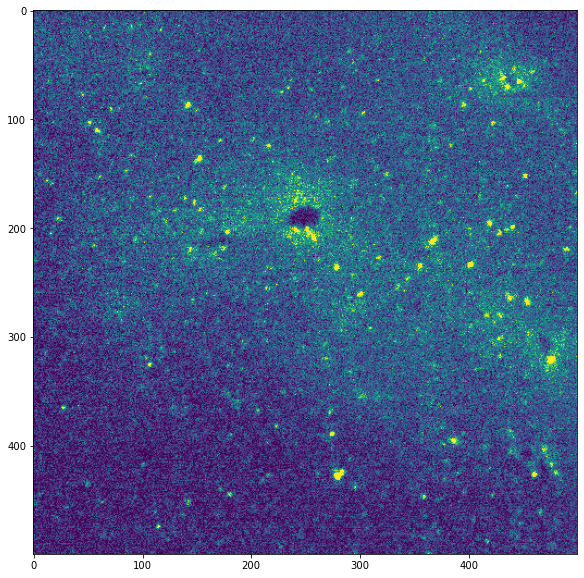

In [12]:
# visually validate that this chunk has tissue and some cells in it
z_plane_to_look_at = 0 # this is z plane of the subvolume we want to look at. Change it to look at other z planes.
stitched_z_plane = ws.source('stitched')[:,:,z_plane_to_look_at] 
print(stitched_z_plane.shape)

fig = plt.figure(figsize=(15,10))
ax=fig.add_subplot(111)
ax.imshow(stitched_z_plane,vmin=0,vmax=200)

# Run the cell detection on this test volume
Just using some initial parameters to make sure we have everything set up properly.

With a subvolume with shape: 500,500,30 the cell detection should only take a few seconds


In [13]:
cell_detection_parameter = cells.default_cell_detection_parameter.copy()
cell_detection_parameter['illumination'] = None
cell_detection_parameter['background_correction']['shape'] = (5,5)
cell_detection_parameter['intensity_detection']['measure'] = ['source','background']
cell_detection_parameter['shape_detection']['threshold'] = 250

io.delete_file(ws.filename('cells', postfix='maxima'))
cell_detection_parameter['maxima_detection']['save'] = ws.filename('cells', postfix='maxima')

processing_parameter = cells.default_cell_detection_processing_parameter.copy()
processing_parameter.update(
    processes = 'serial',
    size_max = 100, #35,
    size_min = 30, #30,
    overlap  = 15, #10,
    verbose = True
    )

cells.detect_cells(ws.filename('stitched'), ws.filename('cells', postfix='raw'),
                   cell_detection_parameter=cell_detection_parameter,
                   processing_parameter=processing_parameter)

Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Background removal shape: (5, 5)
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Background removal form : Disk
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Background removal save : False
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Illumination correction: elapsed time: 0:00:00.147
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: DoG filter: shape : None
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: DoG filter: sigma : None
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: DoG filter: sigma2: None
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: DoG filter: elapsed time: 0:00:00.000
Block 0/

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.519
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.991
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.681
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:02.582
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.736
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.842


'/jukebox/wang/ahoag/test_clearmap2/output/cz15/zimmerman_01_smartspim/zimmerman_01-001/imaging_request_1/output/ch647_renamed/testchunk_cells_raw.npy'

This should have saved a file called testchunk_cells_raw.npy in your output directory that you set at the beginning.

## Inspect the distribution of detected cells in the subvolume

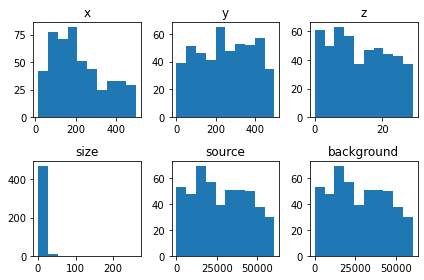

In [14]:
source = ws.source('cells', postfix='raw')

plt.figure(1); plt.clf();
names = source.dtype.names;
nx,ny = 2,3
for i, name in enumerate(names):
    plt.subplot(nx, ny, i+1)
    plt.hist(source[name]);
    plt.title(name)
plt.tight_layout();



## Show cells overlaid on top of tissue to validate cell detection

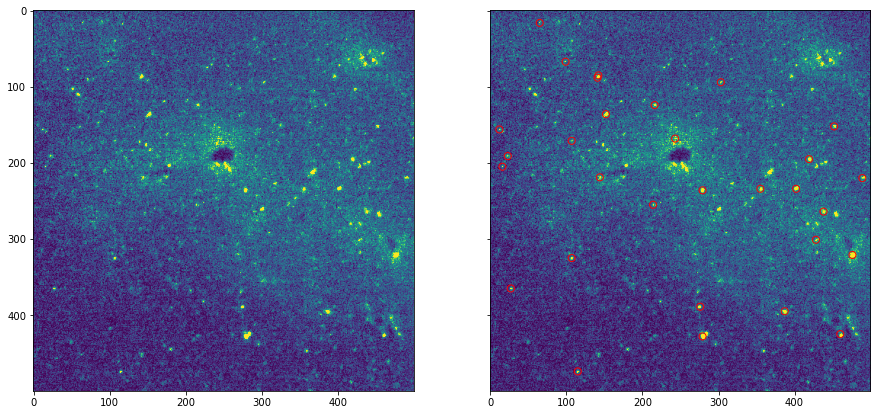

In [15]:
coordinates = np.hstack([ws.source('cells', postfix='raw')[c][:,None] for c in 'xyz']);
this_plane_coords = np.array([coord for coord in coordinates if coord[-1] ==0])
xs = this_plane_coords[:,0]
ys = this_plane_coords[:,1]
fig,axes = plt.subplots(figsize=(15,8),nrows=1,ncols=2,sharex=True,sharey=True)
ax_tissue = axes[0]
ax_tissue.imshow(stitched_z_plane,vmin=0,vmax=200,cmap='viridis')
ax_both=axes[1]
ax_both.imshow(stitched_z_plane,vmin=0,vmax=200,cmap='viridis')
ax_both.scatter(ys,xs,s=50,facecolors='none',edgecolors='r')

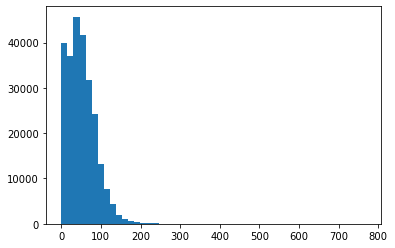

In [37]:
# useful to know what the pixel value distribution looks like for this subchunk
_=plt.hist(ws.source('stitched')[:,:,0].flatten(),bins=50)

## Run the "parameter sweep" 
This runs a loop over a bunch of parameters and saves out a .npy file for each parameter set 

In [31]:
# Here are the parameters we used above:
cell_detection_parameter

{'iullumination_correction': {'flatfield': None, 'scaling': 'mean'},
 'background_correction': {'shape': (5, 5), 'form': 'Disk', 'save': False},
 'equalization': None,
 'dog_filter': {'shape': None, 'sigma': None, 'sigma2': None},
 'maxima_detection': {'h_max': None,
  'shape': 5,
  'threshold': 0,
  'valid': True,
  'save': '/jukebox/wang/ahoag/test_clearmap2/output/cz15/zimmerman_01_smartspim/zimmerman_01-001/imaging_request_1/output/ch647_renamed/testchunk_cells_maxima.npy'},
 'shape_detection': {'threshold': 250, 'save': False},
 'intensity_detection': {'method': 'max',
  'shape': 3,
  'measure': ['source', 'background']},
 'illumination': None,
 'verbose': True}

In [32]:
# Here we list the parameter ranges to sweep over.
background_sizes = [5,7,9] # will make xy tuples like: (5,5), (7,7), (9,9)  
shape_threshold_sizes = [150,250,350]

In [36]:
from itertools import product
for background_size,shape_threshold_size in product(background_sizes,shape_threshold_sizes):
    this_cell_parameter_dict = cell_detection_parameter.copy()
    this_cell_parameter_dict['background_correction']['shape'] = (background_size,background_size)
    this_cell_parameter_dict['shape_detection']['threshold'] = shape_threshold_size
    postfix = f'raw_bck{background_size}_shpthresh{shape_threshold_size}'
#     print(ws.filename('cells', postfix=postfix))
    cells.detect_cells(ws.filename('stitched'), ws.filename('cells', postfix=postfix),
        cell_detection_parameter=this_cell_parameter_dict,
        processing_parameter=processing_parameter)

Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Background removal shape: (5, 5)
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Background removal form : Disk
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Background removal save : False
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Illumination correction: elapsed time: 0:00:00.143
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: DoG filter: shape : None
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: DoG filter: sigma : None
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: DoG filter: sigma2: None
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: DoG filter: elapsed time: 0:00:00.000
Block 0/

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.476
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.919
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.677
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:02.494
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.736
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.922
Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.501
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.810
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.666
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:02.339
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.621
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.846
Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.542
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.850
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.729
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:02.424
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.737
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.951
Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.520
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.884
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.670
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:02.532
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.753
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.970
Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.463
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.800
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.534
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:02.211
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.523
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.678
Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.450
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.829
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.526
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:02.188
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.378
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.510
Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.413
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.773
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.519
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:02.221
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.371
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.501
Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.399
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.751
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.580
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:02.169
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.340
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.478
Processing 1 blocks with function 'detect_cells_block'.
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:

/usr/people/ahoag/.conda/envs/cm/lib/python3.7/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


Shape detection: elapsed time: 0:00:00.386
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.767
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: method: max
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Intensity detection: shape : 3
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Shape detection: elapsed time: 0:00:00.466
Block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: Cell detection: elapsed time: 0:00:01.947
Processing block 0/1<(0, 0, 0)/(1, 1, 1)> (500, 500, 30)@(500, 500, 30)[(:,:,0:30)]: elapsed time: 0:00:02.084
Processed 1 blocks with function 'detect_cells_block': elapsed time: 0:00:02.188


## Visualize the different results from the parameter sweep

# Background shape size: 5, shape threshold size: 150 


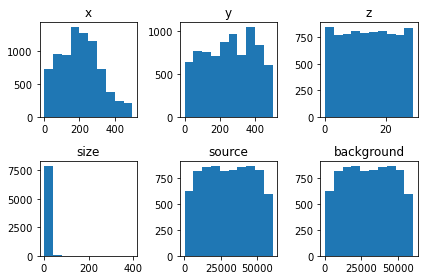

# Background shape size: 5, shape threshold size: 250 


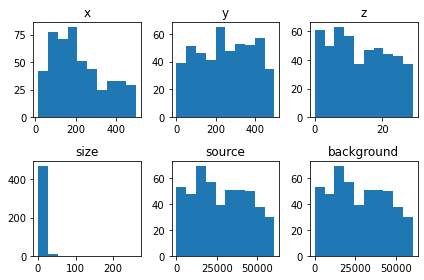

# Background shape size: 5, shape threshold size: 350 


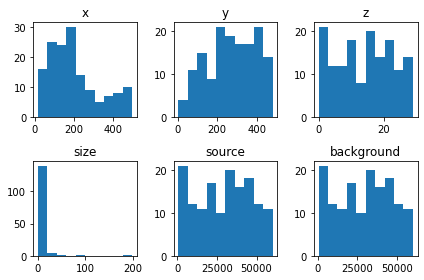

# Background shape size: 7, shape threshold size: 150 


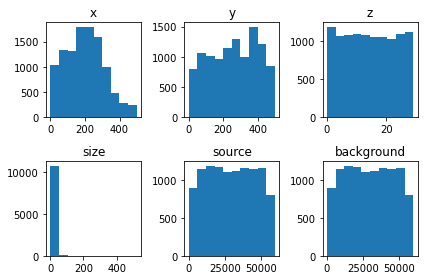

# Background shape size: 7, shape threshold size: 250 


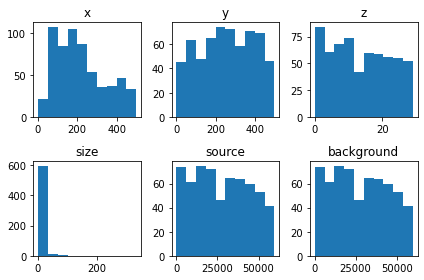

# Background shape size: 7, shape threshold size: 350 


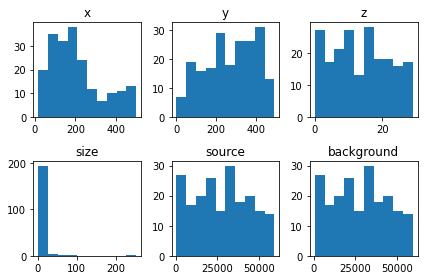

# Background shape size: 9, shape threshold size: 150 


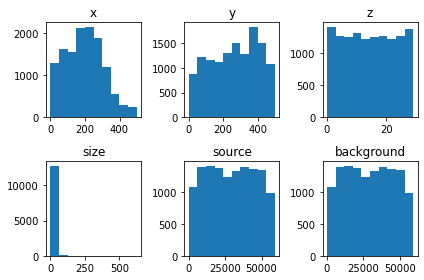

# Background shape size: 9, shape threshold size: 250 


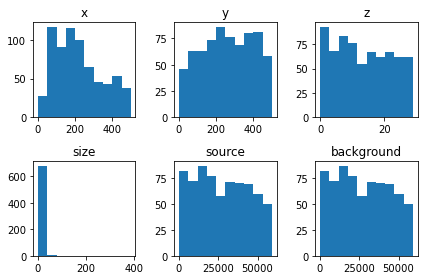

# Background shape size: 9, shape threshold size: 350 


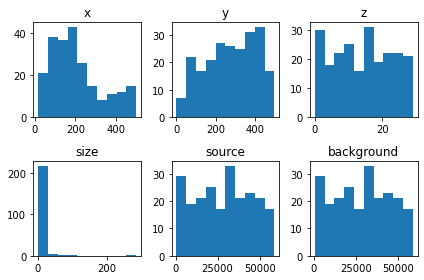

In [41]:
for background_size,shape_threshold_size in product(background_sizes,shape_threshold_sizes):
    postfix = f'raw_bck{background_size}_shpthresh{shape_threshold_size}'
    source = ws.source('cells', postfix=postfix)

    plt.figure(1); plt.clf();
    names = source.dtype.names;
    nx,ny = 2,3
    for i, name in enumerate(names):
        plt.subplot(nx, ny, i+1)
        plt.hist(source[name]);
        plt.title(name)
    plt.tight_layout();
    print(f"# Background shape size: {background_size}, shape threshold size: {shape_threshold_size} ")
    plt.show()



# Background shape size: 5, shape threshold size: 150 


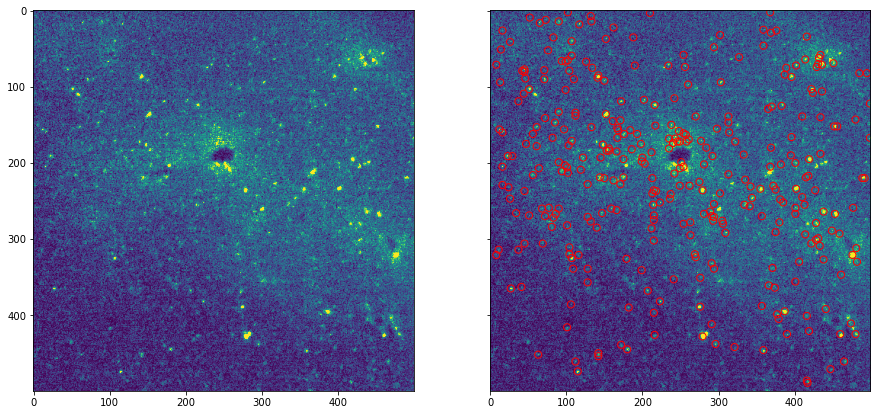

# Background shape size: 5, shape threshold size: 250 


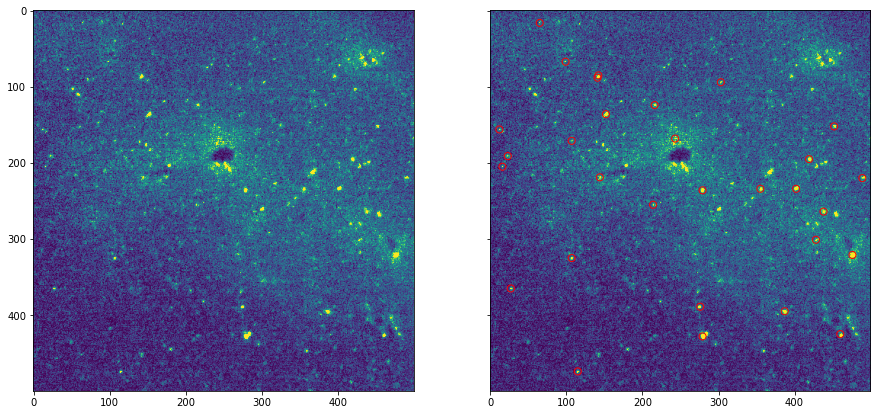

# Background shape size: 5, shape threshold size: 350 


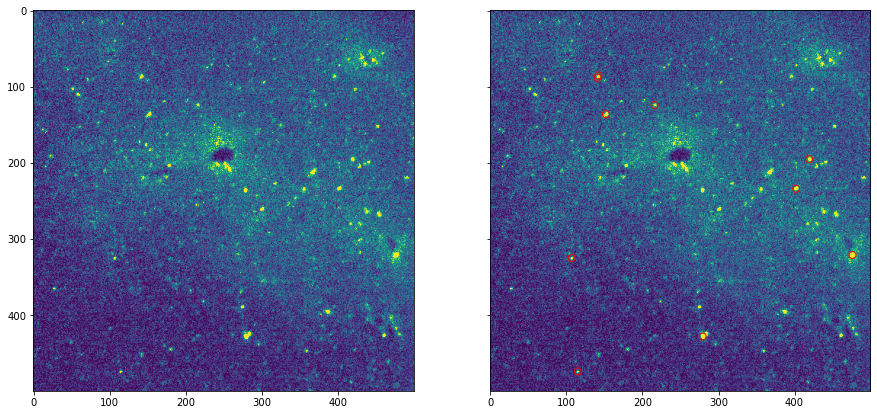

# Background shape size: 7, shape threshold size: 150 


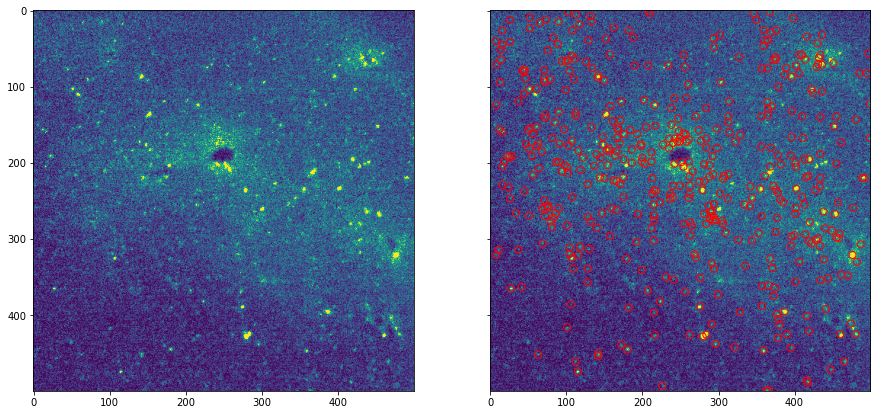

# Background shape size: 7, shape threshold size: 250 


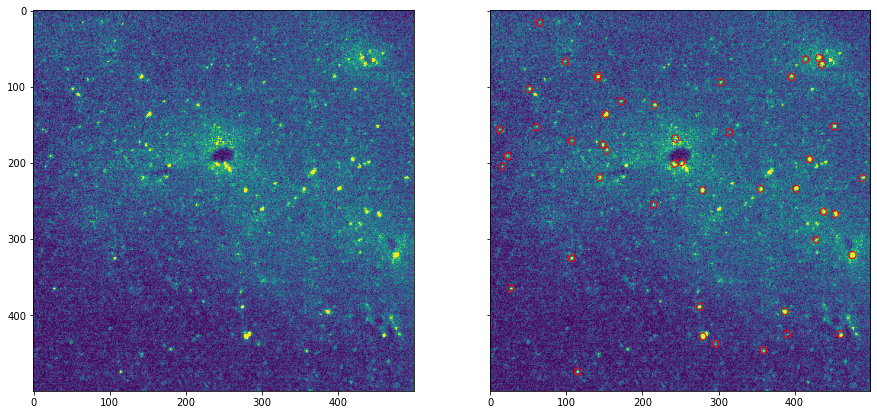

# Background shape size: 7, shape threshold size: 350 


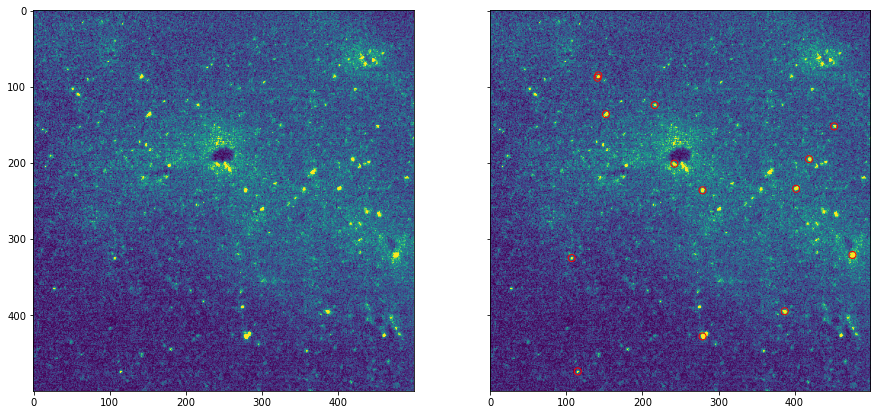

# Background shape size: 9, shape threshold size: 150 


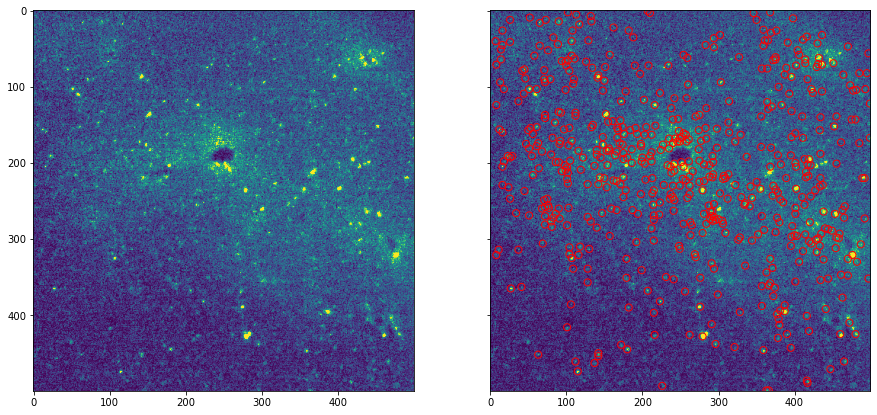

# Background shape size: 9, shape threshold size: 250 


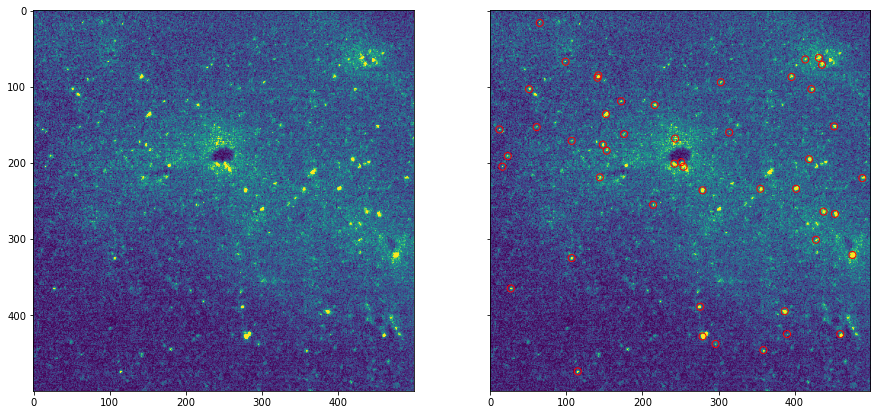

# Background shape size: 9, shape threshold size: 350 


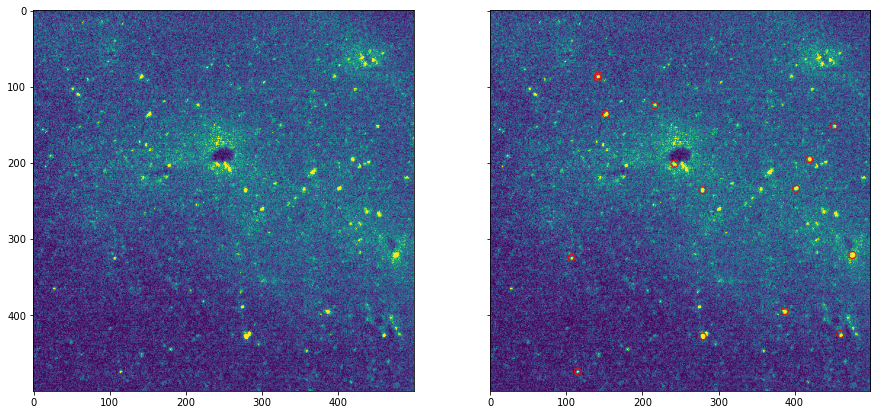

In [43]:
for background_size,shape_threshold_size in product(background_sizes,shape_threshold_sizes):
    postfix = f'raw_bck{background_size}_shpthresh{shape_threshold_size}'
    print(f"# Background shape size: {background_size}, shape threshold size: {shape_threshold_size} ")

    source = ws.source('cells', postfix=postfix)
    coordinates = np.hstack([source[c][:,None] for c in 'xyz']);
    this_plane_coords = np.array([coord for coord in coordinates if coord[-1] ==0])
    xs = this_plane_coords[:,0]
    ys = this_plane_coords[:,1]
    fig,axes = plt.subplots(figsize=(15,8),nrows=1,ncols=2,sharex=True,sharey=True)
    ax_tissue = axes[0]
    ax_tissue.imshow(stitched_z_plane,vmin=0,vmax=200,cmap='viridis')
    ax_both=axes[1]
    ax_both.imshow(stitched_z_plane,vmin=0,vmax=200,cmap='viridis')
    ax_both.scatter(ys,xs,s=50,facecolors='none',edgecolors='r')
    plt.show()